# **Customer Segmentation**

#### Use Case
### Use Case Summary

#### Objective Statement:
- **Product Sales Insight:** Understand the quantity of products sold each month.
- **Customer Spending Insight:** Gain insights into how much customers spend each month.
- **Marketing Risk Reduction:** Make informed decisions on where, when, how, and to whom products, services, or brands will be marketed.
- **Increased Marketing Efficiency:** Direct marketing efforts towards designated segments based on their characteristics.

#### Challenges:
- **Large Data Size:** Data size is too large to maintain using Excel spreadsheets.
- **Coordination:** Requires coordination from multiple departments for data gathering.
- **Incomplete Demographic Data:** Demographic data contains missing values and typos, making analysis challenging.

#### Methodology / Analytic Techniques:
- **Descriptive Analysis:** Summarize and describe the main features of the data.
- **Graph Analysis:** Visual representation of data to identify patterns or trends.
- **Segment Analysis:** Grouping customers into segments based on shared characteristics.

#### Business Benefits:
- **Product Differentiation:** Assist the Business Development Team in creating product differentiation strategies based on customer characteristics.
- **Targeted Customer Treatment:** Guide how customers with specific criteria should be treated.

#### Expected Outcomes:
- **Product Sales Information:** Understand the quantity of products sold every month.
- **Customer Spending Data:** Gain insights into how much customers spend monthly.
- **Customer Segmentation Analysis:** Group customers into segments based on shared characteristics.

#### Recommendations:
- Provide recommendations for marketing strategies based on customer segmentation.







### Business Questions:
1. **Product Sales Analysis:**
   - **Original Question:** How many products are sold every month?
   - **Retail Context:** What is the monthly quantity of products sold across all channels?

2. **Customer Spending Analysis:**
   - **Original Question:** How much do customers spend every month?
   - **Retail Context:** What is the total monthly revenue generated from customer purchases?

3. **Customer Segmentation:**
   - **Original Question:** How about Customer segmentation analysis?
   - **Retail Context:** How can customers be grouped into segments based on their purchasing behavior and demographics?

4. **Recommendations Based on Segmentation:**
   - **Original Question:** How about recommendations based on customer segmentation?
   - **Retail Context:** What targeted strategies can be recommended for each customer segment to improve marketing efficiency and increase sales?


# Data Understanding

-### Data Understanding

- **Data of Retail Transaction:** From 01 December 2010 to 09 December 2011
- **Source Data:** [Online retail dataset by UCI Machine Learning Library](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

#### Data Dictionary:
- **InvoiceNo:** Invoice number uniquely assigned to each transaction.
- **StockCode:** Product (item) code.
- **Description:** Product (item) name.
- **Quantity:** The quantities of each product (item) per transaction.
- **InvoiceDate:** The day and time when each transaction was generated.
- **UnitPrice:** Product price per unit in sterling.
- **CustomerID:** Customer number uniquely assigned to each customer.
- **Country:** The name of the country where each customer resides.


In [12]:
#Importing Packages

!pip install --upgrade openpyxl


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.0 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.0 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.0 kB 722.1 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/250.0 kB 817.0 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.0 kB 778.2 kB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 853.2 kB/s eta 0:00:00


In [15]:
#Importing Packages

!pip show openpyxl



Name: openpyxl
Version: 3.1.2
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: C:\Users\Avantika\AppData\Roaming\Python\Python311\site-packages
Requires: et-xmlfile
Required-by: 


In [4]:
#Importing Packages

! pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/344.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/344.3 kB ? eta -:--:--
   ------ -------------------------------- 61.4/344.3 kB 648.1 kB/s eta 0:00:01
   ------------ ------------------------- 112.6/344.3 kB 930.9 kB/s eta 0:00:01
   ------------------ ------------------- 163.8/344.3 kB 978.3 kB/s eta 0:00:01
   ---------------------- --------------- 204.8/344.3 kB 953.7 kB/s eta 0:00:01
   ---------------------------- --------- 256.0/344.3 kB 983.0 kB/s eta 0:00:01
   --------------------------------- ---- 307.2/344.3 kB 999.9 kB/s eta 0:00:01
   -------------------------------------- 344.3/344.3 kB 971.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0

In [4]:
#Importing Packages

! pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/344.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/344.3 kB ? eta -:--:--
   ------ -------------------------------- 61.4/344.3 kB 648.1 kB/s eta 0:00:01
   ------------ ------------------------- 112.6/344.3 kB 930.9 kB/s eta 0:00:01
   ------------------ ------------------- 163.8/344.3 kB 978.3 kB/s eta 0:00:01
   ---------------------- --------------- 204.8/344.3 kB 953.7 kB/s eta 0:00:01
   ---------------------------- --------- 256.0/344.3 kB 983.0 kB/s eta 0:00:01
   --------------------------------- ---- 307.2/344.3 kB 999.9 kB/s eta 0:00:01
   -------------------------------------- 344.3/344.3 kB 971.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0

In [17]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("C:\\Users\\Avantika\\Downloads\\Customer+Segmentation+Code+and+Files\\Code and Files\\Online Retail.csv")

In [20]:
#Check Dataset

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleaning:
- **Quantity Range:** The minimum and maximum values for Quantity are 80995, which could represent cancelled or returned orders.
- **Negative UnitPrice:** There are negative values in UnitPrice, which is uncommon. These transactions could represent cancelled orders by customers or bad-debt incurred by the business.
- **Action:** We will remove these transactions from the dataset as they do not represent actual sales.

### Steps:
1. Remove transactions with Quantity equal to 80995.
2. Remove transactions with negative UnitPrice.

### Explanation:
- **Quantity Range:** 80995 could indicate cancelled or returned orders, so we'll exclude them.
- **Negative UnitPrice:** These transactions are unusual and likely represent cancelled orders or bad-debt adjustments, so they will be dropped.


In [25]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [26]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are almost 25% missing CustomerID. We need to remove them as there is no way we can get the number of CustomerID.

In [27]:
#Country

df.Country.value_counts(normalize=True) 

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

We can see that there is maximum proportion (More than 90% of customers) of 'United Kingdom' customers. So we will take 'United Kingdom' customer for our analysis.

In [28]:
df = df[df.Country == 'United Kingdom']

Removing the negative values from Quantity and UnitPrice

In [29]:
#Quantity

df = df[df.Quantity > 0]

In [49]:
#InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12-01,20.34


In [50]:
#timebound

print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-12-09 12:49:00
The data is from 1 year transaction


In [51]:
#UnitPrice

df = df[df.UnitPrice > 0]

Removing the Null values from the data.

In [52]:
#CustomerID

df = df[pd.notnull(df['CustomerID'])]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  object        
 9   Date              354321 non-null  object        
 10  Revenue           354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 32.4+ MB


# Exploratory Data Analysis

How many product sold every month?

In [54]:
#Aggregating the Orders by Month

df_agg= df.groupby("Date").Quantity.sum()
df_agg.head()

Date
2010-12-01    21310
2010-12-02    30988
2010-12-03     7648
2010-12-05    13659
2010-12-06    15535
Name: Quantity, dtype: int64

In [55]:
#converting series to dataframe and resetting index.

df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,Date,Quantity
0,2010-12-01,21310
1,2010-12-02,30988
2,2010-12-03,7648
3,2010-12-05,13659
4,2010-12-06,15535


In [56]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

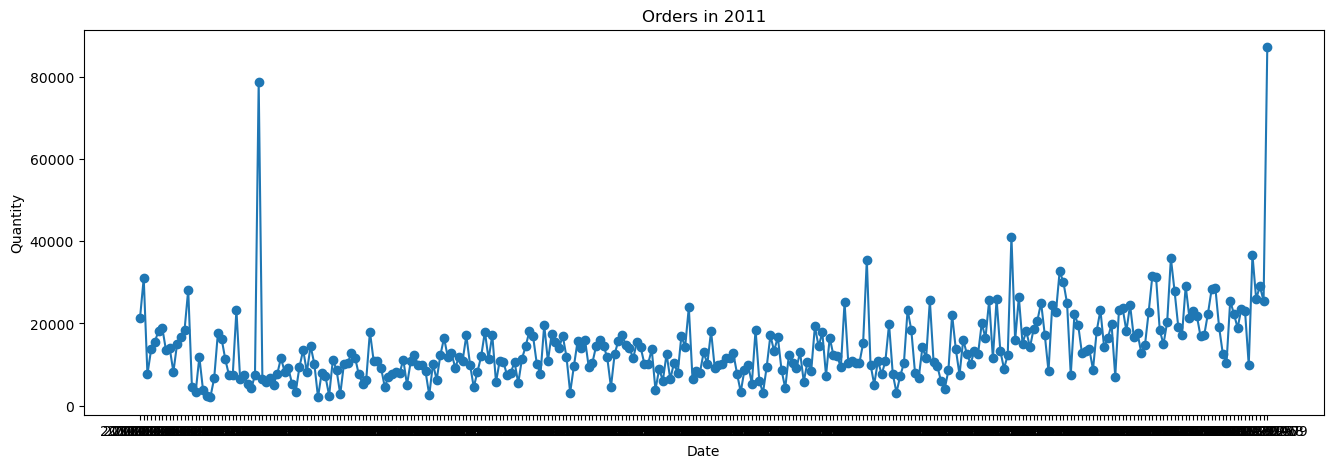

In [58]:
plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

How much customer spend their money every month?

In [59]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

df['Revenue'] = df['Quantity']*df['UnitPrice']

<Axes: ylabel='Revenue'>

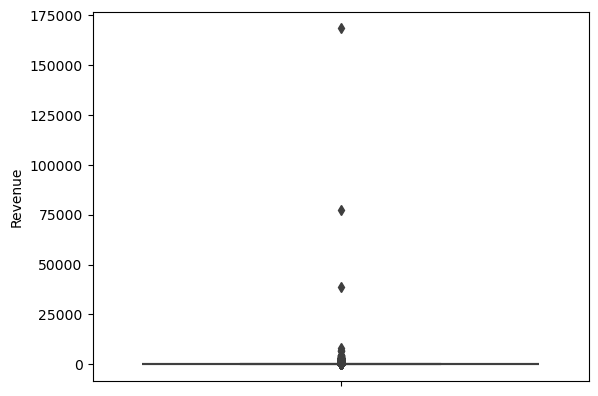

In [60]:
sns.boxplot(y=df['Revenue'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  object        
 9   Date              354321 non-null  object        
 10  Revenue           354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 32.4+ MB


In [62]:
#Monthly Revenue

df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue.head()

,InvoiceYearMonth,Revenue
0,2010-12,498661.850
1,2011-01,442190.060
2,2011-02,355655.630
3,2011-03,467198.590
4,2011-04,409559.141


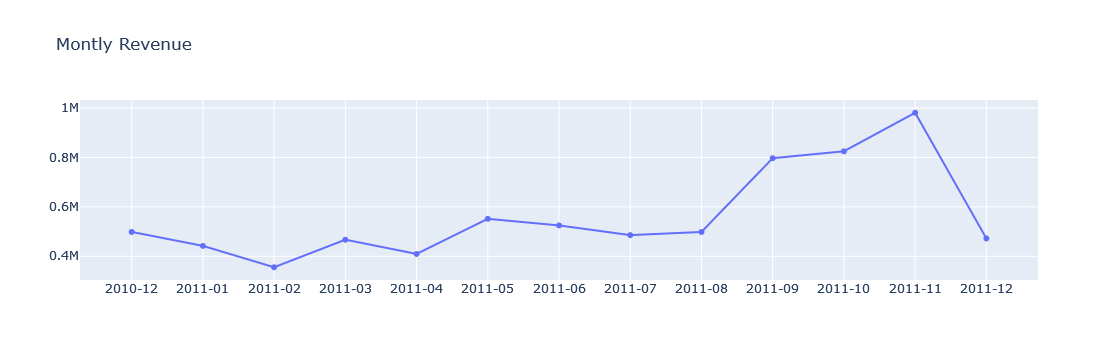

In [63]:
plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# RFM Analysis

### Recency Frequency Monetary (RFM) Analysis

- **RFM analysis** is a method to segment customers based on their purchasing behavior, focusing on three key metrics:

#### Recency:
- **Definition:** This metric measures how recently a customer made a purchase.
- **In Other Words:** It tells us how long it has been since a customer's last purchase.
- **Example:** If a customer made a purchase yesterday, their recency would be "1 day ago".

#### Frequency:
- **Definition:** This metric measures how often a customer makes purchases.
- **In Other Words:** It tells us how frequently a customer buys from us.
- **Example:** If a customer made 5 purchases in the last month, their frequency would be "5 purchases".

#### Monetary:
- **Definition:** This metric measures the total value of purchases a customer has made.
- **In Other Words:** It tells us the total amount of money a customer has spent.
- **Example:** If a customer spent $500 in total, their monetary value would be "$500".

#### Purpose of RFM:
- The goal of RFM analysis is to segment customers based on these three metrics to:
  - Identify high-value customers who spend the most money.
  - Understand customer buying patterns and preferences.
  - Tailor marketing strategies for different customer segments.

### Key Takeaways:
- **Recency:** How recent was the last purchase?
- **Frequency:** How often does the customer buy?
- **Monetary:** How much does the customer spend?

RFM analysis helps businesses target their efforts towards customers who are most likely to make repeat purchases and contribute significantly to revenue.


The last invoice date is 2011–12–09, we will use this date to calculate Recency.

In [64]:
NOW = dt.date(2011,12,9) 
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [65]:
#Recency

df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [66]:
#Frequency - Monetarty

FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4595,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [67]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


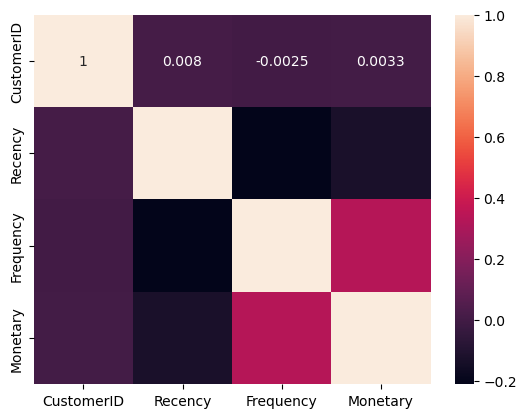

In [68]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

# Modeling Data: RFM Quantiles

- Now we split the metrics into segments using quantiles. 
- We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively. 
- 1 is the highest value, and 4 is the lowest value.
- A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [69]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [70]:
segmented_rfm = RFM_Table.copy()

In [71]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [72]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile

In [73]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [74]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346.0,325,1,77183.60,4,4,1,441
1,12747.0,2,103,4196.01,1,1,1,111
2,12748.0,0,4595,33719.73,1,1,1,111
3,12749.0,3,199,4090.88,1,1,1,111
4,12820.0,3,59,942.34,1,2,2,122


In [75]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [76]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4595,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [77]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  21
Lost Customers:  168
Lost Cheap Customers:  343


In [78]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [79]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [80]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Label
Others                  2135
Loyal Customers          571
Best Customers           409
Lost Cheap Customers     343
Big Spenders             273
Lost Customers           168
Almost Lost               21
Name: count, dtype: int64

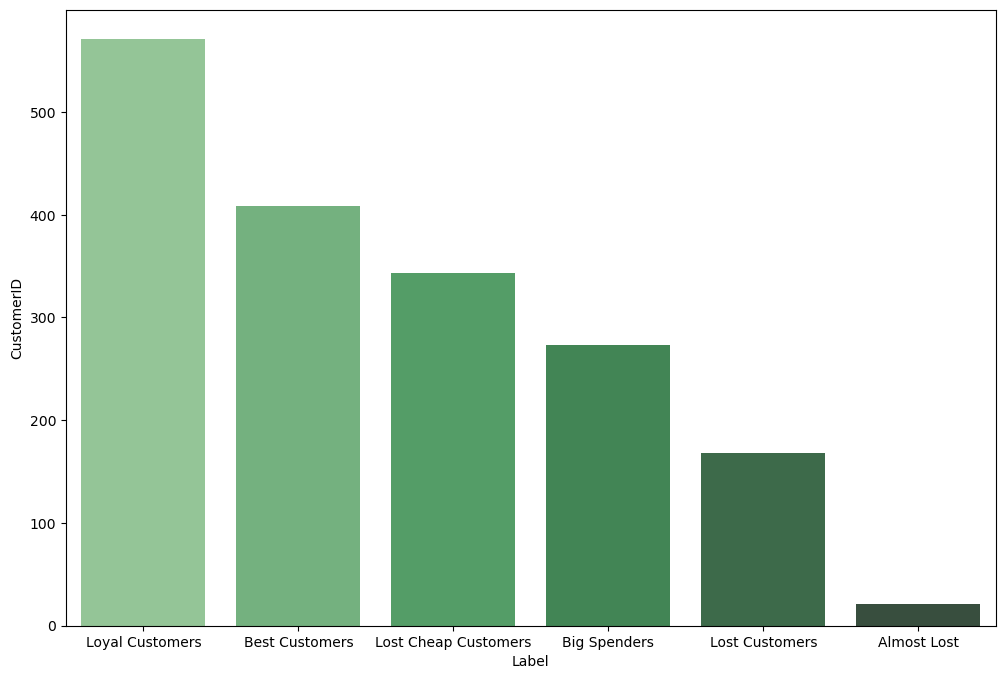

In [81]:
import seaborn as sns
sq1=segmented_rfm.groupby('Label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="CustomerID", palette = "Greens_d");

# Modeling Data: K-Means Clustering

K-Means clustering algorithm is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [82]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [83]:
RFM_Table_New.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


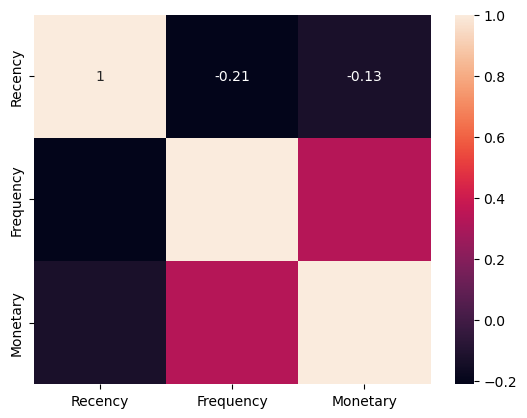

In [84]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

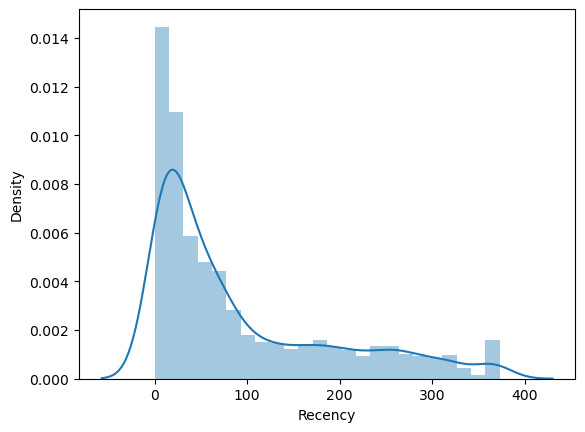

In [85]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

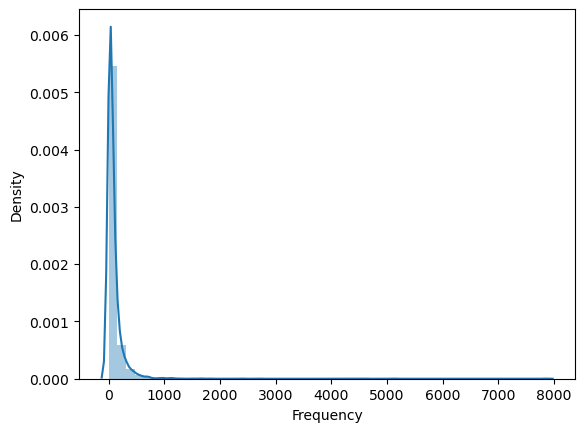

In [86]:
sns.distplot(RFM_Table_New['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

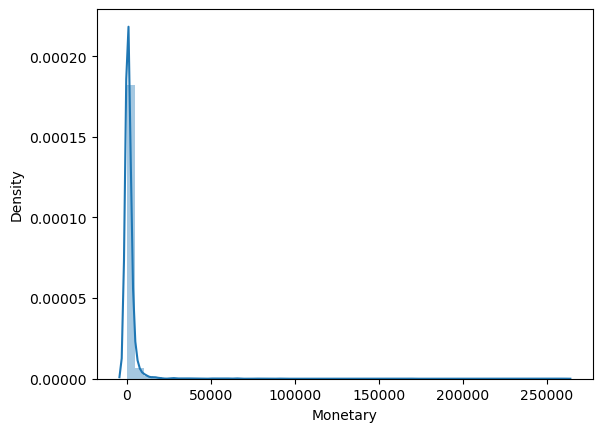

In [87]:
sns.distplot(RFM_Table_New['Monetary'])

- K-means gives the best result under the following conditions:
- Data’s distribution is not skewed.
- Data is standardised.

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.

In [88]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


In [89]:
df_rfm_log = np.log(df_rfm_log+1)

In [90]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [91]:
df_rfm_log = windsoriser.transform(df_rfm_log)

Once the skewness is reduced, I standardised the data by centring and scaling. Note all the variables now have a mean of 0 and a standard deviation of 1.

In [92]:
#Developing preprocessing with StandardScaler

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [93]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,1.465314,-2.075553,2.144184
1,-2.017962,0.758501,1.551863
2,-2.065658,2.072989,2.144184
3,-1.804222,1.296773,1.530119
4,-1.804222,0.305737,0.272403


<Axes: xlabel='Recency', ylabel='Density'>

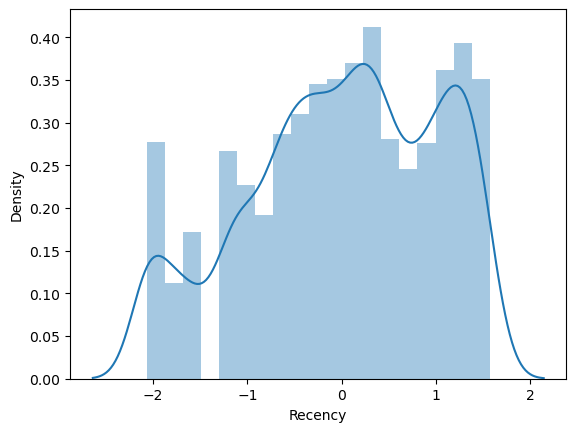

In [94]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

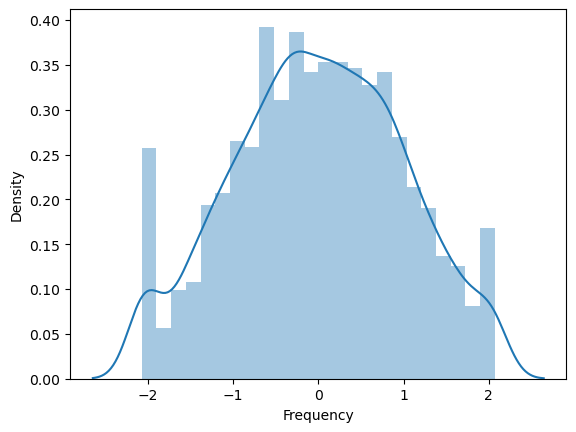

In [95]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

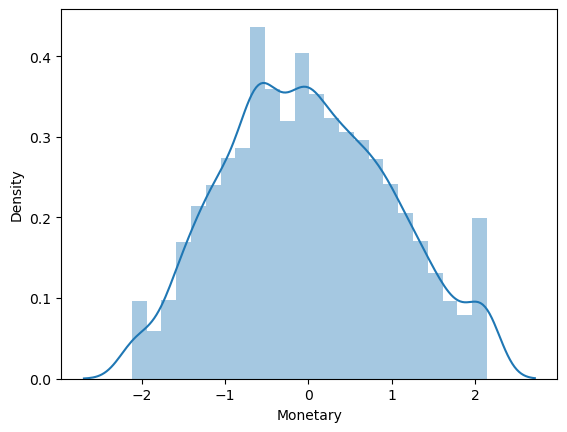

In [101]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

Finding the optimal number of clusters

In [102]:
X = np.asarray(RFM_Table_New_scaled)

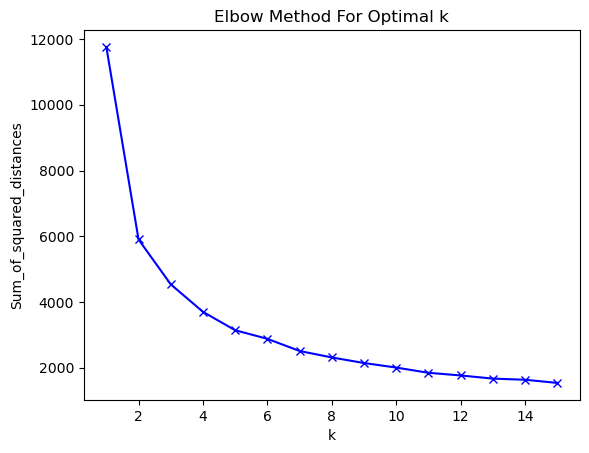

In [103]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [104]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

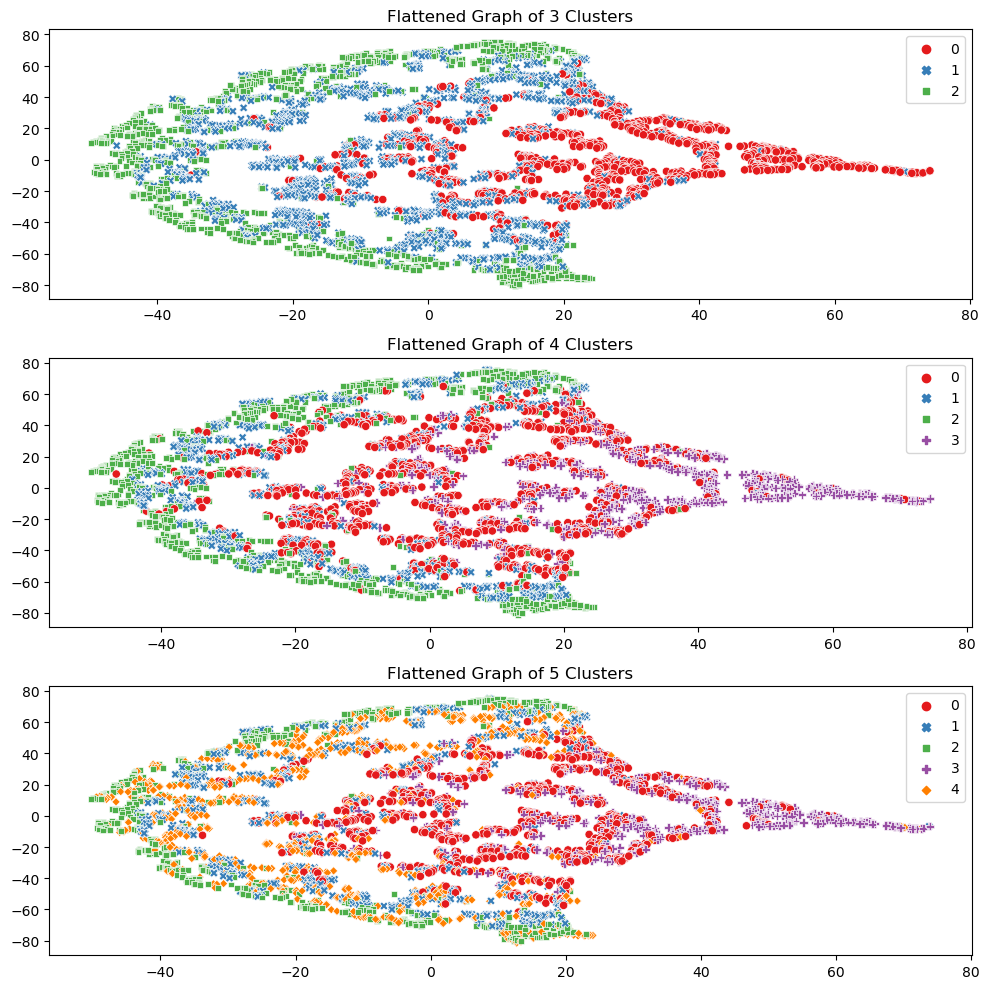

In [105]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()


In [106]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

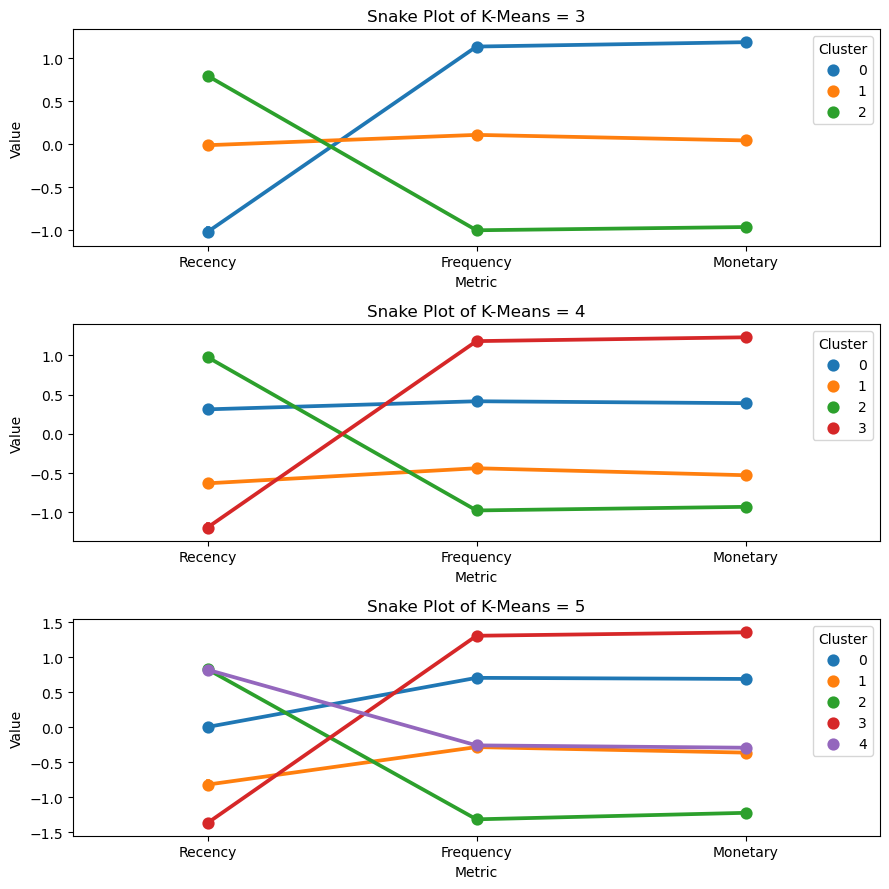

In [107]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

# Evaluating Model: K-Means Clustering

Davies Bouldin Score is a metric for evaluating clustering algorithms.
The smaller Davies Bouldin Score is The more optimal the cluster.


K-Means = 3

In [108]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [109]:
print(davies_bouldin_score(X, kmeans.labels_))

1.10890565934414


K-Means = 4

In [110]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [111]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0540332911713988


K-Means = 5

In [112]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [113]:
print(davies_bouldin_score(X, kmeans.labels_))

1.070192798638494


K-Means 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

In [114]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,0
1,12747.0,2,103,4196.01,3
2,12748.0,0,4595,33719.73,3
3,12749.0,3,199,4090.88,3
4,12820.0,3,59,942.34,3


In [115]:
df_rfm_k4.Cluster.value_counts()

Cluster
2    1173
0    1130
3     854
1     763
Name: count, dtype: int64

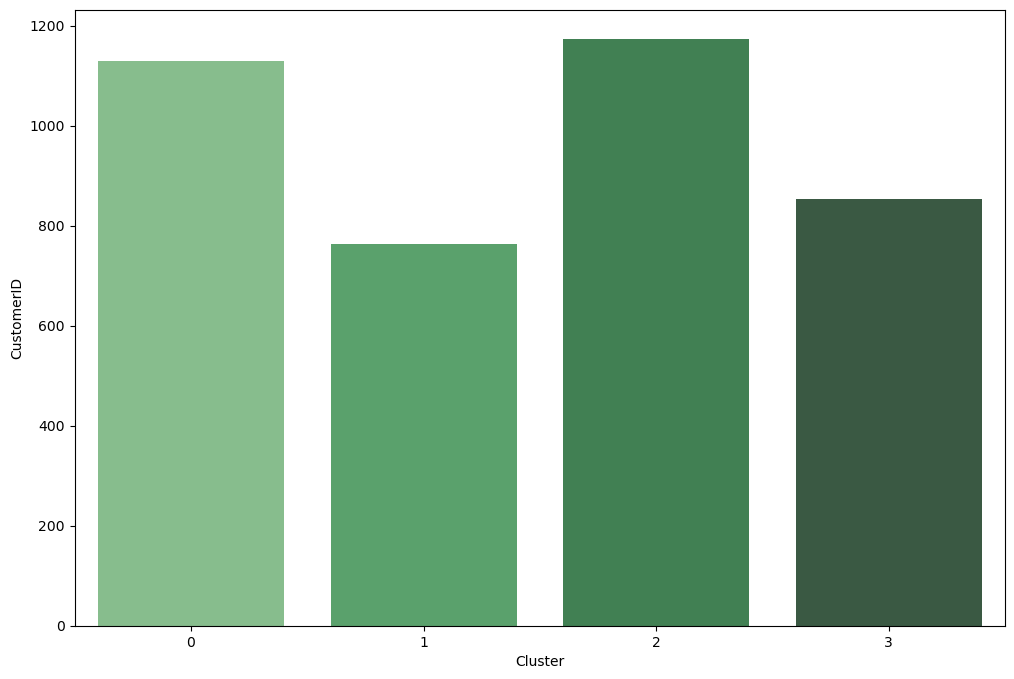

In [116]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

Interpretation of the clusters formed using k-means.

In [117]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [118]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          89.0      81.0   1448.0  1130
1          24.0      30.0    463.0   763
2         197.0      15.0    293.0  1173
3          12.0     260.0   5825.0   854

### Customer Clusters

#### Cluster 0 (29% of customers) - "Loyal Customers"
- **Characteristics:** Haven’t purchased for some time, but used to purchase frequently and spent a lot.
- **Description:** This cluster represents 29% of customers.
- **RFM Profile:** R=3, F=2, M=2
- **Interpretation:** Customers in this cluster used to buy frequently (F=2) and spent a lot, although they haven't made a purchase recently.

#### Cluster 1 (20% of customers) - "Almost Lost"
- **Characteristics:** Purchased recently, but do not purchase frequently and do not spend a lot.
- **Description:** This cluster represents 20% of customers.
- **RFM Profile:** R=2, F=3, M=3
- **Interpretation:** These customers purchased recently (R=2) but do not buy frequently (F=3) and do not spend a lot.

#### Cluster 2 (30% of customers) - "Lost Cheap Customers"
- **Characteristics:** Last purchase was a long time ago, purchased very few items, and spent little.
- **Description:** This cluster represents 30% of customers.
- **RFM Profile:** R=4, F=4, M=4
- **Interpretation:** Customers in this cluster have not made a purchase for a long time (R=4), purchased very few items (F=4), and spent little (M=4).

#### Cluster 3 (21% of customers) - "Best Customers"
- **Characteristics:** Purchase recently, frequent buyers, and spent the most.
- **Description:** This cluster represents 21% of customers.
- **RFM Profile:** R=1, F=1, M=1
- **Interpretation:** These are the "Best Customers" we saw earlier. They purchase recently (R=1), are frequent buyers (F=1), and spent the most (M=1).



### Recommendations

#### For "Best Customers" segment:
- **Recommendation:** Focus on increasing customer purchases, so it is necessary to form a cross/up-selling strategy.
- **Explanation:** These customers are already the best in terms of recency, frequency, and monetary value. To maximize their value, focus on offering complementary or upgraded products/services to encourage additional purchases.

#### For "Loyal Customers" segment:
- **Recommendation:** Optimize budget and time campaigns to maintain loyalty and increase value.
- **Explanation:** Loyal customers are valuable assets. To keep them engaged and loyal, tailor marketing campaigns specifically for them. Offer exclusive deals, loyalty rewards, and personalized recommendations based on their past purchases.

#### For "Almost Lost" segment:
- **Recommendation:** Focus on activating customers and encouraging repurchases with a reactivation and retention strategy.
- **Explanation:** Customers in this segment are at risk of churning. To prevent loss, use reactivation strategies such as targeted promotions, reminders of past purchases, and personalized offers to encourage them to come back and make additional purchases.

#### For "Lost Cheap Customers" segment:
- **Recommendation:** Focus on reactivating customers with a reactivation strategy.
- **Explanation:** These customers have already churned, so the main goal is to bring them back. Use reactivation campaigns with attractive offers, incentives, and reminders of the benefits of your products/services to encourage them to return.

